In [30]:
import psycopg2
from psycopg2 import Error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
import pandas as pd
# Connection parameters, yours will be different
param_dic = {
    "host"      : "ec2-34-239-241-121.compute-1.amazonaws.com",
    "database"  : "dfm419pf436p66",
    "user"      : "eulpledavzofae",
    "password"  : "07be1edaf3f3f3fef6702e318a67f7bfb3dde0268efc076985820060aef10f96"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

In [27]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    #list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # turn it into a pandas dataframe
    heart_dp = pd.DataFrame(tupples, columns=column_names)
    return heart_dp

In [28]:
# Connect to the database
conn = connect(param_dic)
column_names = ["Pt_ID", "Age", "Sex", "Chest Pain Type", "BP", "Cholesterol", "FastingBS","EKG_Result","Max_HR","Exercise_angina","ST_Depressioin","Slope_of_ST","fluro", "Thallium","Heart_Disease"]
# Execute the "SELECT *" query
heart_dp = postgresql_to_dataframe(conn, "select * from heart_dp_original", column_names)
heart_dp.head()

Connecting to the PostgreSQL database...
Connection successful


,Pt_ID,Age,Sex,Chest Pain Type,BP,Cholesterol,FBS>120,EKG Results,Max HR,Exercise_angina,ST_Depressioin,Slope_of_ST,# of vessels fluro,Thallium,Heart Disease
0,10157,43,1,4,110,211,0,0,161,0,0,1,0,7,Absence
1,10436,45,1,4,115,260,0,2,185,0,0,1,0,3,Absence
2,10437,64,1,4,145,212,0,2,132,0,2,2,2,6,Presence
3,10474,52,1,4,108,233,1,0,147,0,0.1,1,3,7,Absence
4,10477,48,1,3,124,255,1,0,175,0,0,1,2,3,Absence


In [17]:
y = heart_dp["Heart_Disease"]
X = heart_dp.drop(columns="Heart_Disease")

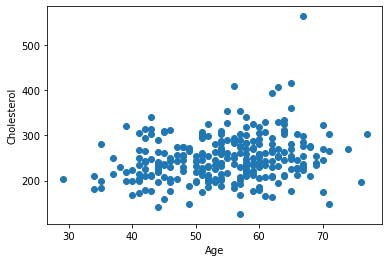

In [36]:
plt.scatter(heart_dp.Age, heart_dp.Cholesterol)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(202, 14)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [20]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [21]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,Presence,Presence
1,Presence,Presence
2,Presence,Absence
3,Presence,Absence
4,Absence,Absence
5,Absence,Absence
6,Presence,Presence
7,Presence,Presence
8,Presence,Absence
9,Presence,Presence


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7794117647058824


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[30  8]
 [ 7 23]]


In [26]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     Absence       0.81      0.79      0.80        38
    Presence       0.74      0.77      0.75        30

    accuracy                           0.78        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.78      0.78      0.78        68

